In [6]:
pip install pyspark

In [7]:
pip install findspark

In [8]:
pip install pandas

### 1. Refresher: Basic SQL Operations in Spark SQL

In [9]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis

In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


1.

In [ ]:
spark.sql('''SELECT DeptID, AVG(Salary) as Ratagaji
FROM employees
GROUP BY DeptId''').show()

+------+--------+
|DeptID|Ratagaji|
+------+--------+
|     1|  2850.0|
|     2|  4100.0|
+------+--------+



2.

In [10]:
spark.sql("""
    SELECT e.Gender, e.Name, e.Salary
    FROM employees e
    JOIN (
        SELECT Gender, AVG(Salary) AS avg_salary
        FROM employees
        GROUP BY Gender
    ) avg_salaries
    ON e.Gender = avg_salaries.Gender
    WHERE e.Salary > avg_salaries.avg_salary
""").show()

+------+-----+------+
|Gender| Name|Salary|
+------+-----+------+
|     M|James|  3000|
+------+-----+------+



3.

In [ ]:
spark.sql('''
SELECT DeptId, Name, Salary,
ROW_NUMBER() OVER (PARTITION BY DeptId ORDER BY Salary) as rank
FROM employees
''').show()

+------+-----+------+----+
|DeptId| Name|Salary|rank|
+------+-----+------+----+
|     1|  Lee|  2700|   1|
|     1|James|  3000|   2|
|     2| Anna|  4100|   1|
+------+-----+------+----+



### 3. Penggunaan Window Functions dan Subqueries

In [ ]:
spark.sql('''
SELECT Name, Age, Salary,
ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

5.

In [ ]:
spark.sql('''
    SELECT e.Name, d.DeptName, e.Salary,
           AVG(e.Salary) OVER (PARTITION BY e.DeptId) AS avg_salary,
           RANK() OVER (PARTITION BY e.DeptId ORDER BY e.Salary DESC) AS salary_rank
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---------+------+----------+-----------+
| Name| DeptName|Salary|avg_salary|salary_rank|
+-----+---------+------+----------+-----------+
|James|       HR|  3000|    2850.0|          1|
|  Lee|       HR|  2700|    2850.0|          2|
| Anna|Marketing|  4100|    4100.0|          1|
+-----+---------+------+----------+-----------+



6.

In [ ]:
spark.sql('''
    SELECT d.DeptName, e.Name, e.Age, e.Salary,
            RANK() OVER (PARTITION BY Age ORDER BY Salary) as rank
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
''').show()

+---------+-----+---+------+----+
| DeptName| Name|Age|Salary|rank|
+---------+-----+---+------+----+
|       HR|  Lee| 23|  2700|   1|
|Marketing| Anna| 28|  4100|   1|
|       HR|James| 34|  3000|   1|
+---------+-----+---+------+----+



### 5. Advanced Data Analysis and Visualization

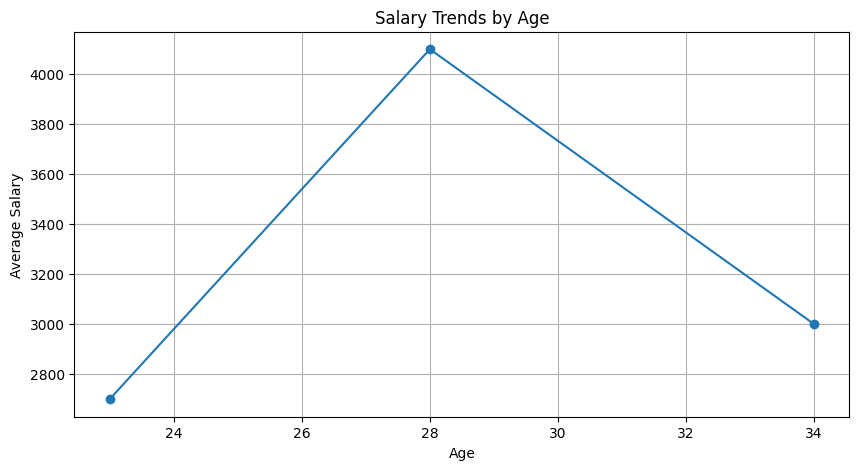

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

1.

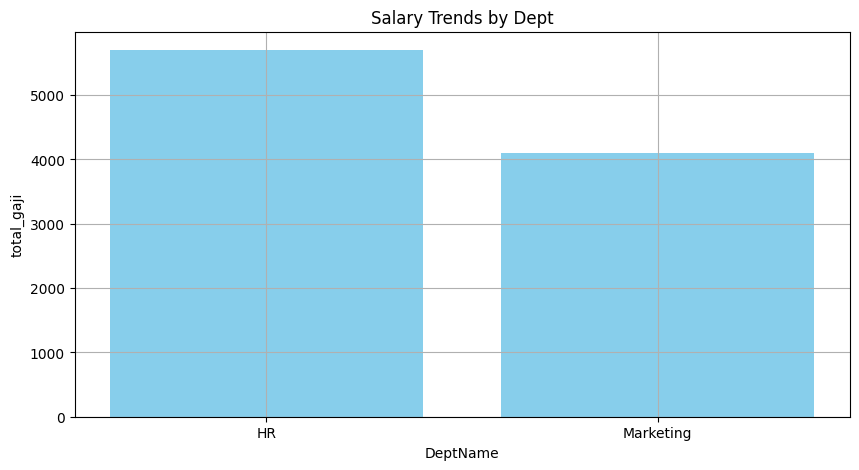

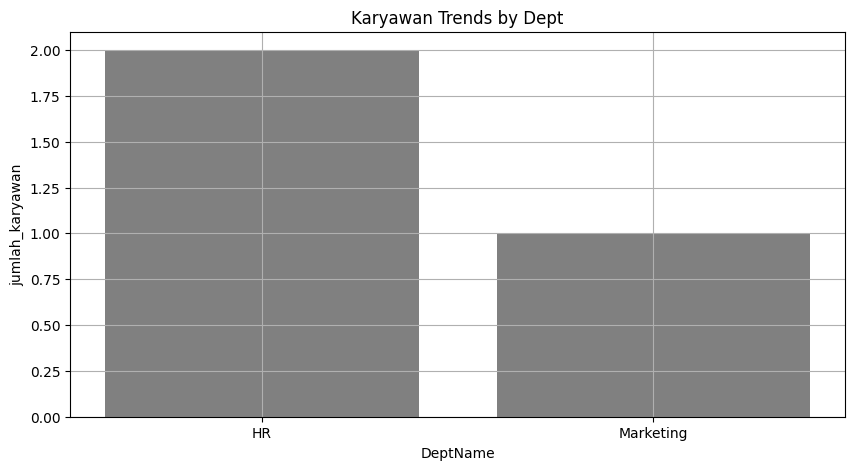

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

total_jumlah = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) as total_gaji, COUNT(e.Name) as jumlah_karyawan
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').toPandas()

plt.figure(figsize=(10, 5))
plt.bar(total_jumlah['DeptName'], total_jumlah['total_gaji'], color = 'skyblue')
plt.xlabel('DeptName')
plt.ylabel('total_gaji')
plt.title('Salary Trends by Dept')
plt.grid(True)
plt.show()
print('\n')
plt.figure(figsize=(10, 5))
plt.bar(total_jumlah['DeptName'], total_jumlah['jumlah_karyawan'], color = 'grey')
plt.xlabel('DeptName')
plt.ylabel('jumlah_karyawan')
plt.title('Karyawan Trends by Dept')
plt.grid(True)
plt.show()

2.

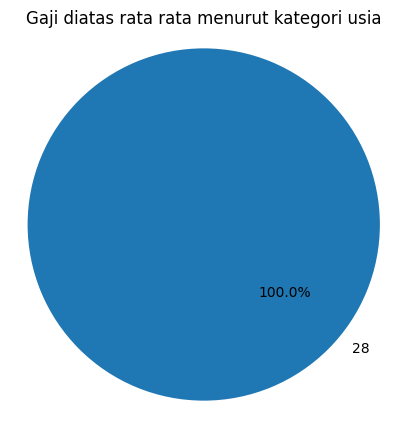

In [4]:
gaji_usia=spark.sql('''
SELECT Age, Name,Salary,
RANK() OVER (PARTITION BY Age ORDER BY Salary DESC) as gaji_diatas_rata
FROM employees
WHERE Salary > (SELECT AVG(Salary) FROM employees)
GROUP BY Age, Salary, Name
ORDER BY Age
''').toPandas()

plt.figure(figsize=(5,5))
plt.pie(gaji_usia['Salary'], labels=gaji_usia['Age'], autopct='%1.1f%%', startangle=140)
plt.title('Gaji diatas rata rata menurut kategori usia')
plt.axis('equal')
plt.show()

3.

In [ ]:
!pip install pandas openpyxl

Saving indian_startup_funding_Lab1.xlsx to indian_startup_funding_Lab1 (13).xlsx


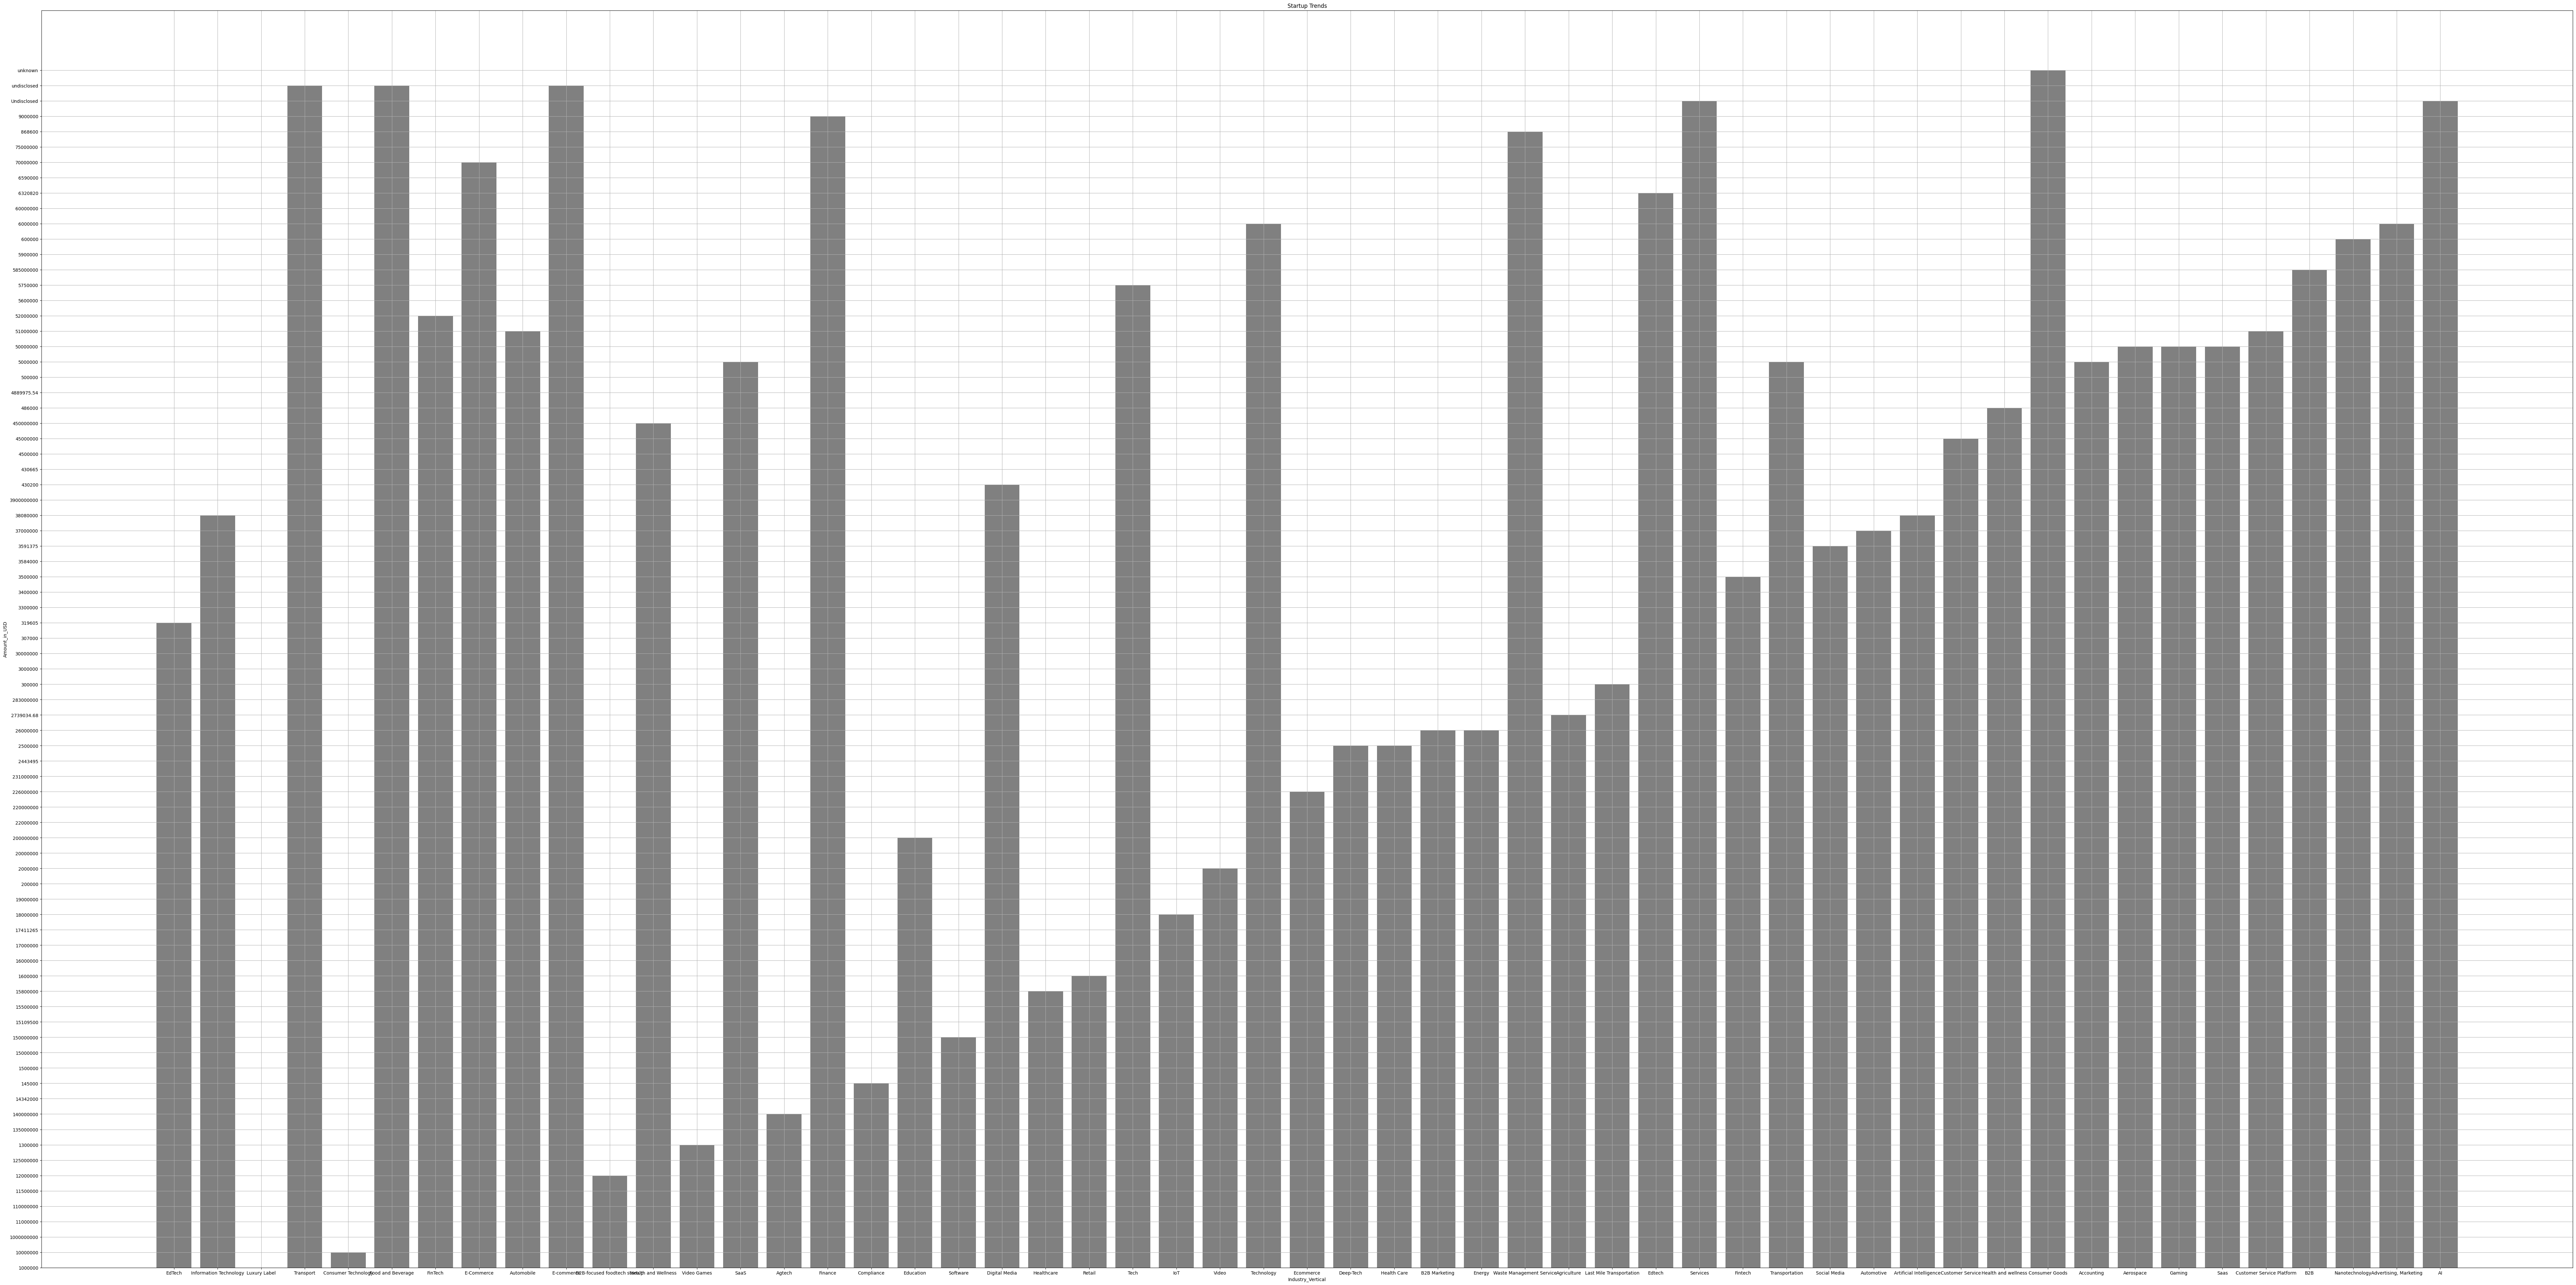

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ExcelImport').getOrCreate()

file_name = list(uploaded.keys())[0]
df_pandas = pd.read_excel(file_name)

df = spark.createDataFrame(df_pandas)

df.createOrReplaceTempView('df')

visual = spark.sql('''
SELECT Startup_Name, Industry_Vertical, Amount_in_USD,
ROW_NUMBER() OVER (PARTITION BY Industry_Vertical ORDER BY Amount_in_USD DESC) as rank
FROM df
GROUP BY Startup_Name, Industry_Vertical, Amount_in_USD
ORDER BY Amount_in_USD
''').toPandas()

plt.figure(figsize=(100, 50))
plt.bar(visual['Industry_Vertical'], visual['Amount_in_USD'], color = 'grey')
plt.xlabel('Industry_Vertical')
plt.ylabel('Amount_in_USD')
plt.title('Startup Trends')
plt.grid(True)
plt.show()
